**Apache spark**

In [2]:
!pip install pyspark
#installing the pyspark

     |████████████████████████████████| 281.4 MB 33 kB/s 
     |████████████████████████████████| 198 kB 50.3 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.1-py2.py3-none-any.whl size=281853642 sha256=41d62dbc0fe2bf926189753bdaa88337741028009ff09d30b425797ca6d8c0ac
  Stored in directory: /root/.cache/pip/wheels/9f/f5/07/7cd8017084dce4e93e84e92efd1e1d5334db05f2e83bcef74f
Successfully built pyspark


In [3]:
import pyspark

In [4]:
from pyspark.sql import SparkSession

In [5]:
spark=SparkSession.builder.appName('uber').getOrCreate()

In [6]:
spark

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import pandas as pd
df_pyspark =spark.read.csv("/content/drive/My Drive/Colab Notebooks/rides.csv",header=True,inferSchema=True)
#reading the csv file from drive

In [9]:
df_pyspark

DataFrame[id: string, timestamp: double, hour: int, day: int, month: int, datetime: string, timezone: string, source: string, destination: string, cab_type: string, product_id: string, name: string, price: string, distance: double, surge_multiplier: double, latitude: double, longitude: double, temperature: double, apparentTemperature: double, short_summary: string, long_summary: string, precipIntensity: double, precipProbability: double, humidity: double, windSpeed: double, windGust: double, windGustTime: int, visibility: double, temperatureHigh: double, temperatureHighTime: int, temperatureLow: double, temperatureLowTime: int, apparentTemperatureHigh: double, apparentTemperatureHighTime: int, apparentTemperatureLow: double, apparentTemperatureLowTime: int, icon: string, dewPoint: double, pressure: double, windBearing: int, cloudCover: double, uvIndex: int, visibility.1: double, ozone: double, sunriseTime: int, sunsetTime: int, moonPhase: double, precipIntensityMax: double, uvIndexTime

In [10]:
df_pyspark.show()

+--------------------+----------------+----+---+-----+-------------------+----------------+----------------+--------------------+--------+--------------------+------------+-----+--------+----------------+--------+---------+-----------+-------------------+---------------+--------------------+---------------+-----------------+--------+---------+--------+------------+----------+---------------+-------------------+--------------+------------------+-----------------------+---------------------------+----------------------+--------------------------+--------------------+--------+--------+-----------+----------+-------+------------+-----+-----------+----------+---------+------------------+-----------+--------------+------------------+--------------+------------------+----------------------+--------------------------+----------------------+--------------------------+
|                  id|       timestamp|hour|day|month|           datetime|        timezone|          source|         destination

In [11]:
df_pyspark.head(5)

[Row(id='424553bb-7174-41ea-aeb4-fe06d4f4b9d7', timestamp=1544952607.89, hour=9, day=16, month=12, datetime='2018-12-16 09:30:07', timezone='America/New_York', source='Haymarket Square', destination='North Station', cab_type='Lyft', product_id='lyft_line', name='Shared', price='5', distance=0.44, surge_multiplier=1.0, latitude=42.2148, longitude=-71.033, temperature=42.34, apparentTemperature=37.12, short_summary=' Mostly Cloudy ', long_summary=' Rain throughout the day. ', precipIntensity=0.0, precipProbability=0.0, humidity=0.68, windSpeed=8.66, windGust=9.17, windGustTime=1545015600, visibility=10.0, temperatureHigh=43.68, temperatureHighTime=1544968800, temperatureLow=34.19, temperatureLowTime=1545048000, apparentTemperatureHigh=37.95, apparentTemperatureHighTime=1544968800, apparentTemperatureLow=27.39, apparentTemperatureLowTime=1545044400, icon=' partly-cloudy-night ', dewPoint=32.7, pressure=1021.98, windBearing=57, cloudCover=0.72, uvIndex=0, visibility.1=10.0, ozone=303.8, su

In [12]:
df_pyspark.printSchema()

root
 |-- id: string (nullable = true)
 |-- timestamp: double (nullable = true)
 |-- hour: integer (nullable = true)
 |-- day: integer (nullable = true)
 |-- month: integer (nullable = true)
 |-- datetime: string (nullable = true)
 |-- timezone: string (nullable = true)
 |-- source: string (nullable = true)
 |-- destination: string (nullable = true)
 |-- cab_type: string (nullable = true)
 |-- product_id: string (nullable = true)
 |-- name: string (nullable = true)
 |-- price: string (nullable = true)
 |-- distance: double (nullable = true)
 |-- surge_multiplier: double (nullable = true)
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)
 |-- temperature: double (nullable = true)
 |-- apparentTemperature: double (nullable = true)
 |-- short_summary: string (nullable = true)
 |-- long_summary: string (nullable = true)
 |-- precipIntensity: double (nullable = true)
 |-- precipProbability: double (nullable = true)
 |-- humidity: double (nullable = true)
 |-- 

In [13]:
type(df_pyspark)

pyspark.sql.dataframe.DataFrame

In [14]:
df_pyspark.columns

['id',
 'timestamp',
 'hour',
 'day',
 'month',
 'datetime',
 'timezone',
 'source',
 'destination',
 'cab_type',
 'product_id',
 'name',
 'price',
 'distance',
 'surge_multiplier',
 'latitude',
 'longitude',
 'temperature',
 'apparentTemperature',
 'short_summary',
 'long_summary',
 'precipIntensity',
 'precipProbability',
 'humidity',
 'windSpeed',
 'windGust',
 'windGustTime',
 'visibility',
 'temperatureHigh',
 'temperatureHighTime',
 'temperatureLow',
 'temperatureLowTime',
 'apparentTemperatureHigh',
 'apparentTemperatureHighTime',
 'apparentTemperatureLow',
 'apparentTemperatureLowTime',
 'icon',
 'dewPoint',
 'pressure',
 'windBearing',
 'cloudCover',
 'uvIndex',
 'visibility.1',
 'ozone',
 'sunriseTime',
 'sunsetTime',
 'moonPhase',
 'precipIntensityMax',
 'uvIndexTime',
 'temperatureMin',
 'temperatureMinTime',
 'temperatureMax',
 'temperatureMaxTime',
 'apparentTemperatureMin',
 'apparentTemperatureMinTime',
 'apparentTemperatureMax',
 'apparentTemperatureMaxTime']

In [15]:
df_pyspark.dtypes

[('id', 'string'),
 ('timestamp', 'double'),
 ('hour', 'int'),
 ('day', 'int'),
 ('month', 'int'),
 ('datetime', 'string'),
 ('timezone', 'string'),
 ('source', 'string'),
 ('destination', 'string'),
 ('cab_type', 'string'),
 ('product_id', 'string'),
 ('name', 'string'),
 ('price', 'string'),
 ('distance', 'double'),
 ('surge_multiplier', 'double'),
 ('latitude', 'double'),
 ('longitude', 'double'),
 ('temperature', 'double'),
 ('apparentTemperature', 'double'),
 ('short_summary', 'string'),
 ('long_summary', 'string'),
 ('precipIntensity', 'double'),
 ('precipProbability', 'double'),
 ('humidity', 'double'),
 ('windSpeed', 'double'),
 ('windGust', 'double'),
 ('windGustTime', 'int'),
 ('visibility', 'double'),
 ('temperatureHigh', 'double'),
 ('temperatureHighTime', 'int'),
 ('temperatureLow', 'double'),
 ('temperatureLowTime', 'int'),
 ('apparentTemperatureHigh', 'double'),
 ('apparentTemperatureHighTime', 'int'),
 ('apparentTemperatureLow', 'double'),
 ('apparentTemperatureLowTime'

In [16]:
df_pyspark.describe()

DataFrame[summary: string, id: string, timestamp: string, hour: string, day: string, month: string, datetime: string, timezone: string, source: string, destination: string, cab_type: string, product_id: string, name: string, price: string, distance: string, surge_multiplier: string, latitude: string, longitude: string, temperature: string, apparentTemperature: string, short_summary: string, long_summary: string, precipIntensity: string, precipProbability: string, humidity: string, windSpeed: string, windGust: string, windGustTime: string, visibility: string, temperatureHigh: string, temperatureHighTime: string, temperatureLow: string, temperatureLowTime: string, apparentTemperatureHigh: string, apparentTemperatureHighTime: string, apparentTemperatureLow: string, apparentTemperatureLowTime: string, icon: string, dewPoint: string, pressure: string, windBearing: string, cloudCover: string, uvIndex: string, visibility.1: string, ozone: string, sunriseTime: string, sunsetTime: string, moonP

In [17]:
import pandas as pd
df_pyspark =spark.read.csv("/content/drive/My Drive/Colab Notebooks/rides.csv",header=True,inferSchema=True)

In [18]:
df_pyspark.show()

+--------------------+----------------+----+---+-----+-------------------+----------------+----------------+--------------------+--------+--------------------+------------+-----+--------+----------------+--------+---------+-----------+-------------------+---------------+--------------------+---------------+-----------------+--------+---------+--------+------------+----------+---------------+-------------------+--------------+------------------+-----------------------+---------------------------+----------------------+--------------------------+--------------------+--------+--------+-----------+----------+-------+------------+-----+-----------+----------+---------+------------------+-----------+--------------+------------------+--------------+------------------+----------------------+--------------------------+----------------------+--------------------------+
|                  id|       timestamp|hour|day|month|           datetime|        timezone|          source|         destination

In [19]:
df_pyspark.drop('windGustTime','visibility','temperatureHigh','temperatureHighTime','temperatureLow','temperatureLowTime','apparentTemperatureHigh','apparentTemperatureHighTime','apparentTemperatureLow','apparentTemperatureLowTime').show()

+--------------------+----------------+----+---+-----+-------------------+----------------+----------------+--------------------+--------+--------------------+------------+-----+--------+----------------+--------+---------+-----------+-------------------+---------------+--------------------+---------------+-----------------+--------+---------+--------+--------------------+--------+--------+-----------+----------+-------+------------+-----+-----------+----------+---------+------------------+-----------+--------------+------------------+--------------+------------------+----------------------+--------------------------+----------------------+--------------------------+
|                  id|       timestamp|hour|day|month|           datetime|        timezone|          source|         destination|cab_type|          product_id|        name|price|distance|surge_multiplier|latitude|longitude|temperature|apparentTemperature|  short_summary|        long_summary|precipIntensity|precipProbabilit

In [20]:
df_pyspark.groupBy('cab_type').count().show()

+--------+------+
|cab_type| count|
+--------+------+
|    Lyft|307408|
|    Uber|385663|
+--------+------+



In [22]:
import matplotlib.pyplot as plt

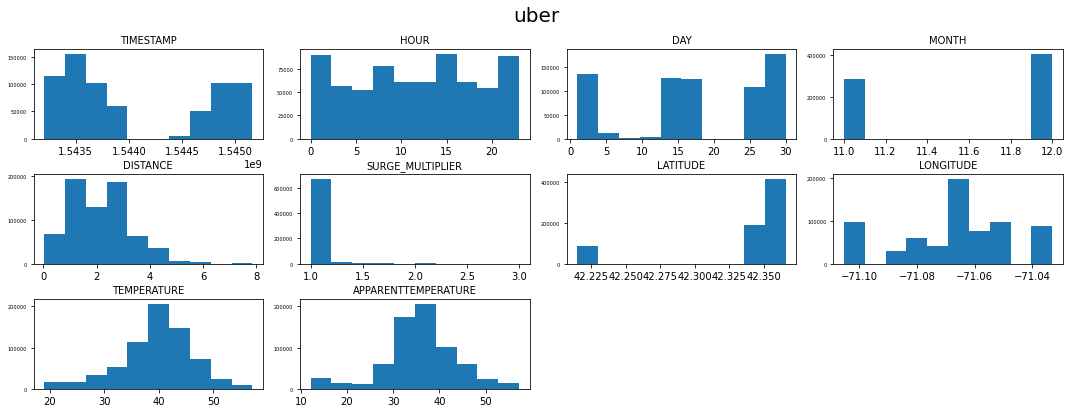

In [25]:
fig=plt.figure(figsize=(15,6))
st=fig.suptitle("uber",fontsize=20)
for col, num in zip(df_pyspark.toPandas().describe().columns,range(1,11)):
  ax=fig.add_subplot(3,4, num)
  ax.hist(df_pyspark.toPandas()[col])
  plt.xticks(fontsize=10)
  plt.yticks(fontsize=5)
  plt.title(col.upper(),fontsize=10)
plt.tight_layout()
st.set_y(0.95)
fig.subplots_adjust(top=0.85,hspace=0.4)
plt.show()